<a href="https://colab.research.google.com/github/Tdas-christ/Reinforcement_Learning/blob/main/2348569_RL_Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [61]:
# Initializing the environment
env = gym.make('CartPole-v1', render_mode='human')

# Parameters
gamma = 0.99  # Discount factor
alpha = 0.1   # Learning rate
num_episodes = 500

In [62]:
def discretize_state(state, bins):
    """Discretize continuous state into discrete bins."""
    state_bins = [
        np.linspace(-4.8, 4.8, bins),
        np.linspace(-4, 4, bins),
        np.linspace(-0.418, 0.418, bins),
        np.linspace(-4, 4, bins)
    ]
    state_index = [int(np.digitize(state[i], state_bins[i])) for i in range(len(state))]
    return tuple(state_index)

In [63]:
# Initializing the Q-table
bins = 10
state_space_size = (bins + 1,) * 4
action_space_size = env.action_space.n
Q = np.random.uniform(low=-1, high=1, size=state_space_size + (action_space_size,))

In [64]:
def choose_action(state, epsilon):
    """Epsilon-greedy action selection."""
    if np.random.rand() < epsilon:
        return np.random.choice(action_space_size)
    else:
        return np.argmax(Q[state])

In [65]:
def temporal_difference_learning(env, Q, num_episodes, alpha, gamma, epsilon_decay):
    """Implement TD(0) learning algorithm."""
    rewards_per_episode = []
    epsilon = 1.0

    for episode in range(num_episodes):
        state = discretize_state(env.reset(), bins)
        total_reward = 0
        done = False

        while not done:
            action = choose_action(state, epsilon)
            next_state, reward, done, _ = env.step(action)
            next_state = discretize_state(next_state, bins)

            # Update Q-value using TD(0) formula
            best_next_action = np.argmax(Q[next_state])
            Q[state][action] += alpha * (reward + gamma * Q[next_state][best_next_action] - Q[state][action])

            state = next_state
            total_reward += reward

        rewards_per_episode.append(total_reward)
        epsilon *= epsilon_decay  # Decay epsilon

        # Logging progress
        if (episode + 1) % 50 == 0:
            print(f"Episode {episode + 1}/{num_episodes}, Total Reward: {total_reward}")

    return rewards_per_episode

In [66]:
# Train the agent
epsilon_decay = 0.995
rewards = temporal_difference_learning(env, Q, num_episodes, alpha, gamma, epsilon_decay)

Episode 50/500, Total Reward: 17.0
Episode 100/500, Total Reward: 44.0
Episode 150/500, Total Reward: 18.0
Episode 200/500, Total Reward: 27.0
Episode 250/500, Total Reward: 28.0
Episode 300/500, Total Reward: 18.0
Episode 350/500, Total Reward: 21.0
Episode 400/500, Total Reward: 14.0
Episode 450/500, Total Reward: 22.0
Episode 500/500, Total Reward: 23.0


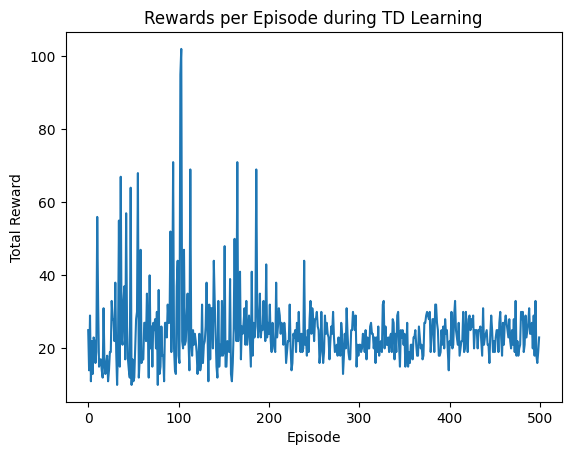

In [67]:
# Visualize rewards
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Rewards per Episode during TD Learning')
plt.show()

In [68]:
# Reduce to 3D by taking the max over the last dimension
q_heatmap = np.max(Q, axis=-1)
if len(q_heatmap.shape) == 4:  # Check for unexpected 4D shapes
    q_heatmap = np.max(q_heatmap, axis=-1)

print(f"Updated shape of q_heatmap: {q_heatmap.shape}")

Updated shape of q_heatmap: (11, 11, 11)


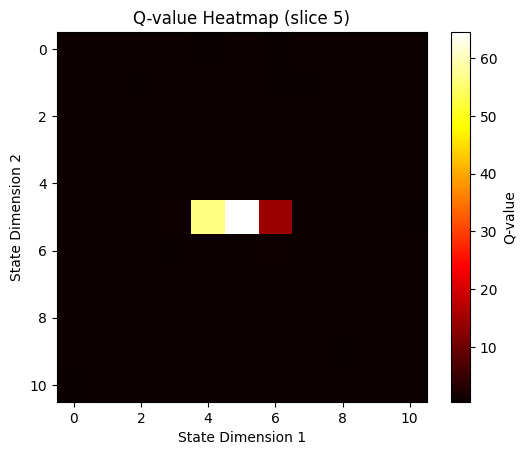

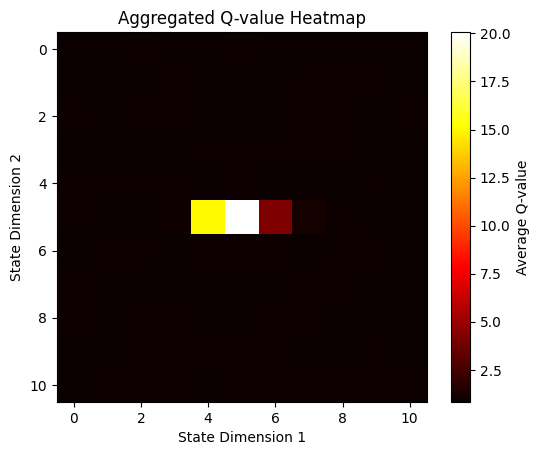

In [69]:
if len(q_heatmap.shape) == 3:
    # Visualize a slice
    slice_index = 5
    if slice_index < q_heatmap.shape[2]:
        q_slice = q_heatmap[:, :, slice_index]
        plt.imshow(q_slice, cmap='hot', interpolation='nearest')
        plt.colorbar(label='Q-value')
        plt.title(f'Q-value Heatmap (slice {slice_index})')
        plt.xlabel('State Dimension 1')
        plt.ylabel('State Dimension 2')
        plt.show()

    # Visualize aggregated Q-values
    aggregated_q_values = q_heatmap.mean(axis=-1)
    plt.imshow(aggregated_q_values, cmap='hot', interpolation='nearest')
    plt.colorbar(label='Average Q-value')
    plt.title('Aggregated Q-value Heatmap')
    plt.xlabel('State Dimension 1')
    plt.ylabel('State Dimension 2')
    plt.show()
else:
    print("Still unable to visualize Q-values. Please debug further.")
